# Proof of concept. 

**Optimizing sensor locations with evolutionary computing**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

import scipy as sp
import scipy.ndimage

import importlib
import positioning_sensors as ps
importlib.reload(ps)


<module 'positioning_sensors' from '/Users/rodrigo/SourceCodes/git/optimal_light_sensor_location/positioning_sensors.py'>

In [15]:
#Original nocturnal image without values <21
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)
nonsat = ps.desaturate(luminance,th=62)
non_smooth_nonsat = nonsat


sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')


W1 = ps.f5(nonsat,importance)
W2 = ps.f2(nonsat,importance)


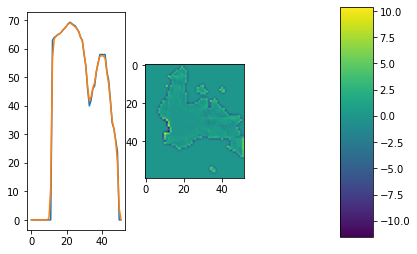

In [24]:
plt.subplot(131)
plt.plot(non_smooth_nonsat[30][:])
plt.plot(nonsat[30][:])
plt.subplot(132)
plt.imshow(non_smooth_nonsat-nonsat)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

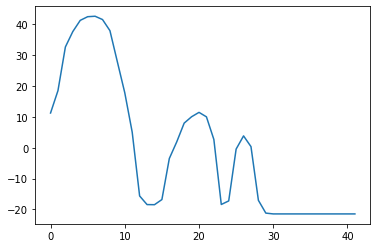

In [27]:
y = nonsat[20][10:]


y = y-np.mean(y)
plt.plot(y)
plt.show()

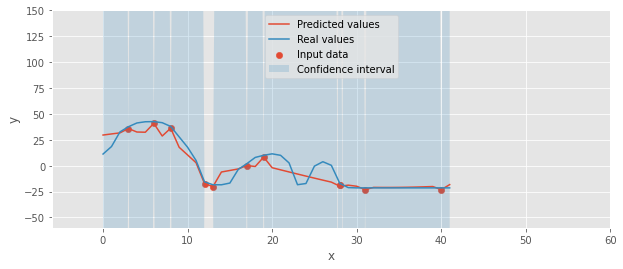

65.43757017189984


In [40]:




X = np.array([np.random.randint(0,len(y)) for i in range(int(len(y)*0.4))])
X = np.array([np.random.randint(0,len(y)) for i in range(11)])
#X = np.arange(0,40,4)
Y = np.array(y[X])-np.mean(np.array(y[X]))

plt.style.use("ggplot")




X_pred = np.arange(len(y))
# pykrige doesn't support 1D data for now, only 2D or 3D
# adapting the 1D input to 2D
uk = OrdinaryKriging(X, np.zeros(X.shape), Y,variogram_model = "spherical")
y_pred, y_std = uk.execute("grid", X_pred, np.array([0.0]))
y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.scatter(X, Y, s=40, label="Input data")
ax.plot(X_pred, y_pred, label="Predicted values")
ax.plot(X_pred, y, label="Real values")
ax.fill_between(
    X_pred,
    y_pred - 3 * y_std,
    y_pred + 3 * y_std,
    alpha=0.2,
    label="Confidence interval",
)
ax.legend(loc=9)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-6, 60)
ax.set_ylim(-60, 150)

plt.show()

print(np.mean((y_pred-y)**2))

References

fmt: off
Data taken from
https://blog.dominodatalab.com/fitting-gaussian-process-models-python/